<a href="https://colab.research.google.com/github/phycem/Data-Science-Projects-and-Tasks/blob/main/Last%20version_Awake_Labs_Data_Science_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modularize the task code for readability by using cookiecutter. https://github.com/drivendata/cookiecutter-data-science

In [ ]:
 pip install cookiecutter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.8 MB/s 


In [ ]:
!cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

project_name [project_name]: Aborted!
^C


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set()

from scipy.stats import skew
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score 


import plotly.graph_objects as go
import tensorflow as tf

import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/phycem/Data-Science-Projects-and-Tasks/main/Awake%20Labs%20Take%20Home%20Challenge/Dataset%20for%20DS%20Challenge.csv')

In [3]:
import pandas as pd

Fix a column name sex to male. 

#Loading the dataset into DF dataframe

##  There is none of the feature values on rows after row 303 present

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


## Preview the info of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   sex           303 non-null    float64
 2   cp            303 non-null    float64
 3   trtbps        303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restecg       303 non-null    float64
 7   thalachh      303 non-null    float64
 8   exng          303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    float64
 11  caa           303 non-null    float64
 12  thall         303 non-null    float64
 13  output        303 non-null    float64
 14  o2Saturation  3586 non-null   float64
dtypes: float64(15)
memory usage: 420.4 KB


## Drop the empty rows on the table.

In [6]:
df = df.dropna(axis=0)

In [7]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,97.5
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,97.5
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,97.5
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,97.5


###INFO: 
###Sex: 1 is male , 0 is female
###Output: 1 is heart attack, 0 is normal
###cp: Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic 
###trtbps: Resting blood pressure
###chol: Cholestoral in mg/dl fetched via BMI sensor
###fbs: (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
###restecg: Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
###thalachh: Maximum heart rate achieved
###oldpeak : previous peak
###slp : slope ranges from 1-6 (found below)
###caa: number of major vessels
###thall: Thalium Stress Test result ~ (0,3)
###exng: Exercise induced angina ~ 1 = Yes, 0 = No
###o2Saturation: Blood oxygen saturation (%)
###target: Heart disease (1 = no, 0= yes)


## Check if there is still any missing value.

In [8]:
df.isnull().sum()

age             0
sex             0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
output          0
o2Saturation    0
dtype: int64

#Heart Disease Output Value Distribution in a Pie Chart

In [ ]:
#@title #Heart Disease Output Value Distribution in a Pie Chart
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease Distribution of Values']
values = df['output'].value_counts()/df['output'].shape[0]

fig0 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig0.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig0.update_layout(
    title_text="Heart Disease",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig0.show()

NOTE: Since Github does not display interactive images I have such as pie charts, I am uploading images of the each produced pie charts here. 

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import Image
Image('newplot.png')

#Heart attack results are balanced. It can be fairly comparable among features such as colestrol, resting blood pressure, age, ...  

In [ ]:
#@title #Participants female male category
colors = ['gold', 'mediumturquoise']
labels = ['Female','Male']
values = df['sex'].value_counts()/df['sex'].shape[0]

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig1.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig1.update_layout(
    title_text="All participants sexes",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig1.show()

In [ ]:
def age_cohort(age):
    if age <= 45:
        return "0-45"
    elif age > 45 and age <= 55:
        return "45-55"
    elif age > 55 and age <= 60:
        return "55-60"
    elif age > 60:
        return "60+"
    
df['age'] = df['age'].apply(age_cohort)
df.sort_values('age', inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
colors = ['gold', 'mediumturquoise']
labels = df['age'].value_counts().index
values = df['age'].value_counts()

fig2 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig2.update_layout(
    title_text="Age Group Distribution"
)
fig2.show()

# There are 8 categorical features and 5 continuous features 

###Number of people between the ages:
###0-45 are 21.1 % 
###45-55 are 29%
###55-60 are 23.8 % 
###60+ are 26.1%

### Number of people in sexes:
###Female 68.3%
### Male 31.7 % 

###Number of people who are in the risk of heart attack is 45.5 %  and normal is 54.5% 


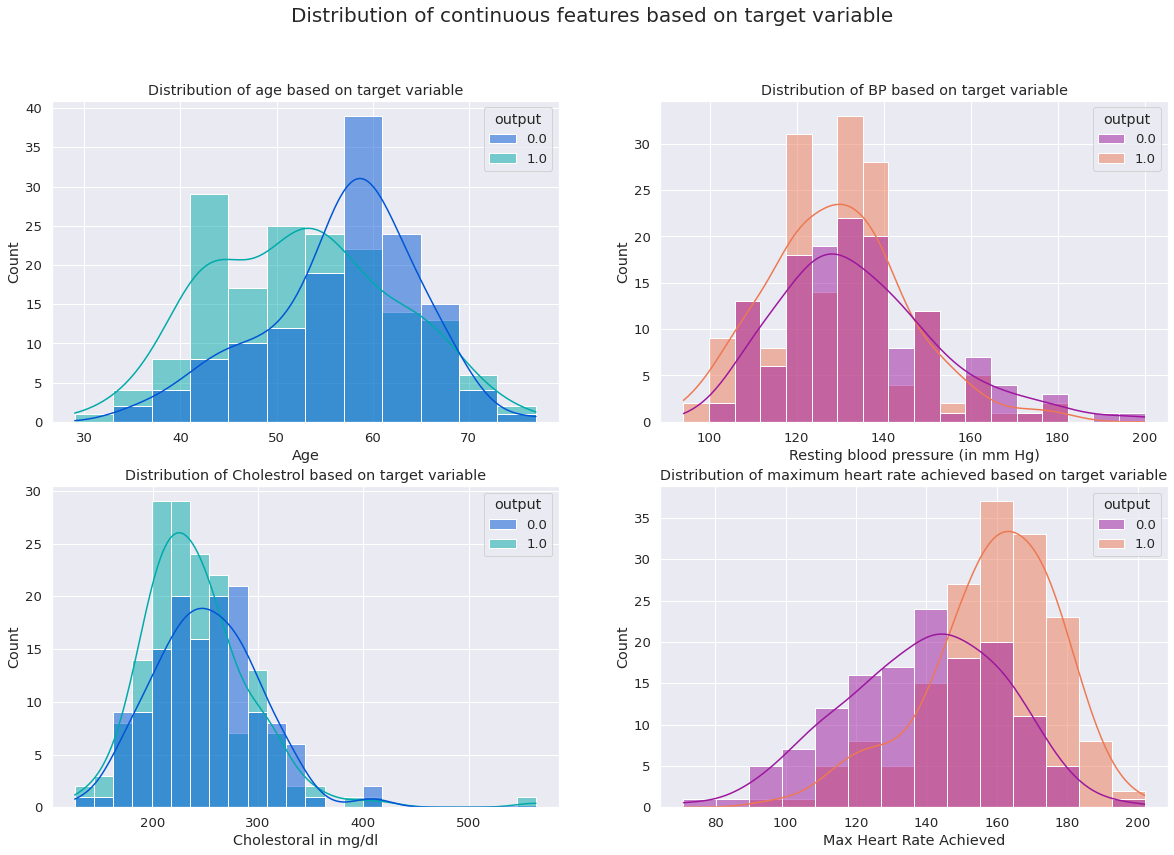

In [9]:
#@title #Normal and Heart Attack Chance distributed on Continuous features
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of continuous features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= df, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= df, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

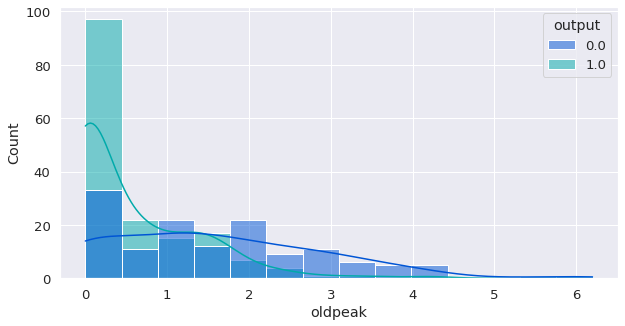

In [10]:
#@title Previous peak plot (continuous)
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(1,0, figsize = (10, 5))

sns.histplot(x ='oldpeak', data= df, hue= 'output', kde= True, palette='winter')

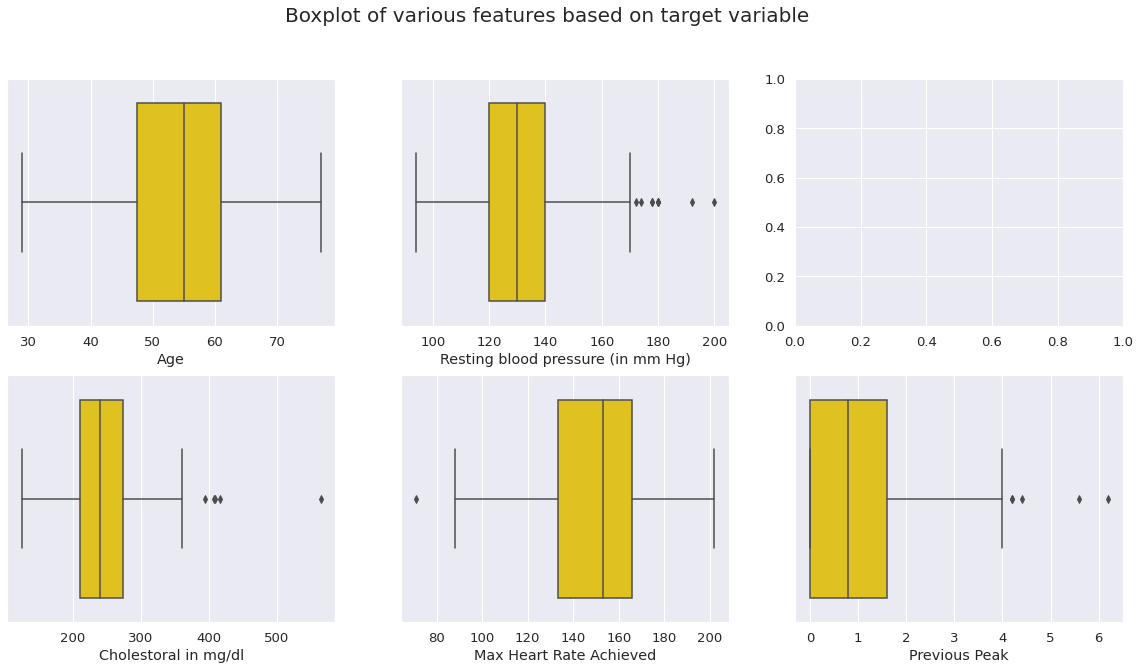

In [11]:
#@title #There are outliers for resting blood pressure, Cholestoral, maximum heart rate, previous peak.
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 3, figsize = (20, 10))

plt.suptitle('Boxplot of various features based on target variable', fontsize = 20)

ax1 = sns.boxplot(x ='age', data= df, ax= ax[0, 0], color = '#FFD700')
ax1.set(xlabel = 'Age')

ax2 = sns.boxplot(x ='trtbps', data= df, ax= ax[0, 1], color='#FFD700')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)')

ax3 = sns.boxplot(x ='chol', data= df, hue= 'output', ax= ax[1, 0], color= '#FFD700')
ax3.set(xlabel = 'Cholestoral in mg/dl')

ax4 = sns.boxplot(x ='thalachh', data= df, ax= ax[1, 1], color = '#FFD700')
ax4.set(xlabel = 'Max Heart Rate Achieved')

ax5 = sns.boxplot(x ='oldpeak', data= df, ax= ax[1, 2], color = '#FFD700')
ax5.set(xlabel = 'Previous Peak')


plt.show()

#Check the outliers in detail at below histograms and let's fix them if there is any anomaly. 

##The outliers show no anomaly such as having 0 Cholesterol or 0 maximum Heart rate achieved with high Heart attack chances. 

##Setting up a histogram plot:


In [ ]:
def plot_histgram(feature):    
    fig = px.histogram(df, x=feature,
                       color="output", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title_font_color="white",
        legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="grey",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

In [ ]:
def display_stat(feature):
    mean = df[feature].mean()
    std = df[feature].std()
    skew = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

#Age

In [ ]:
#@title Age: Mean of heart disease patients are 58 whereas normal are 52
plot_histgram('age')
display_stat('age')

TypeError: ignored

##Resting Blood Pressure

In [ ]:
plot_histgram('trtbps')
display_stat('trtbps')

mean: 131.6238, std: 17.5381, skew: 0.7138, kurtosis: 0.9291 


The observable outlier for the Resting Blood Pressure is the 0 Resting Blood Pressure which is impossible to have a heart attack chance. We can replace this value with the median value to balance the data set. 

##Cholesterol 

In [ ]:

fig0= plot_histgram('chol')
fig0.show()
display_stat('chol')

AttributeError: ignored

There is no visible outliers and the dataset is distributed fairly.

##Maximum Heart Rate Achieved

In [ ]:
plot_histgram('thalachh')
display_stat('thalachh')

mean: 149.6469, std: 22.9052, skew: -0.5374, kurtosis: -0.0620 


No visible outliers. The dataset is distributed fairly. 

#Previous Peak

During heart attack or close to heart attack, the heart rate signals get fewer. It is reasonable to have higher chances of heart attack when the heart rate peaks get lesser on the histogram. 

Saving heart attack signals.png to heart attack signals (1).png


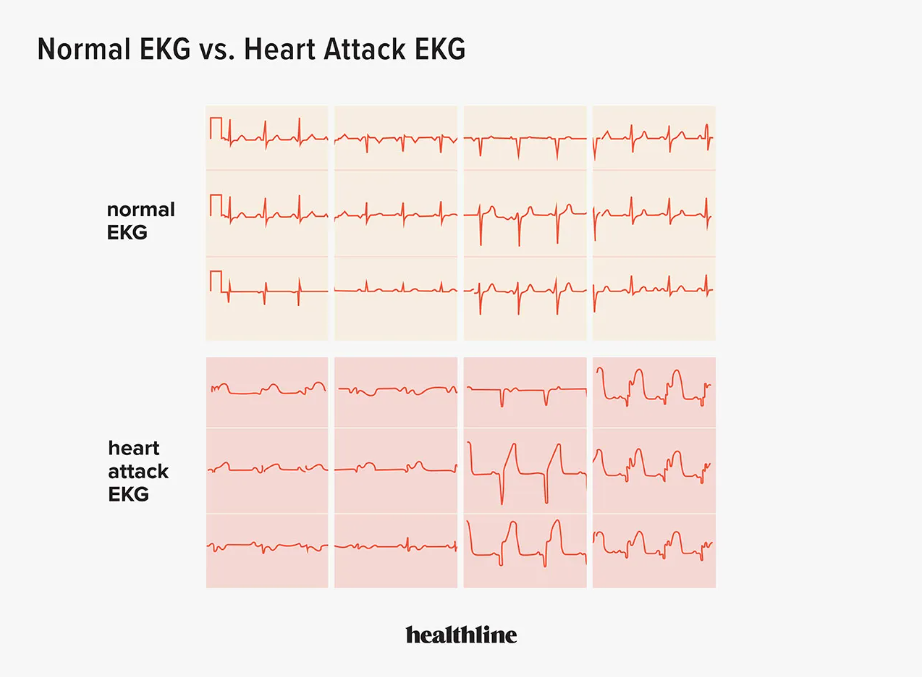

In [ ]:
#@title Heart rate signals
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('heart attack signals.png')

In [ ]:
plot_histgram('oldpeak')
display_stat('oldpeak')

mean: 1.0396, std: 1.1611, skew: 1.2697, kurtosis: 1.5758 


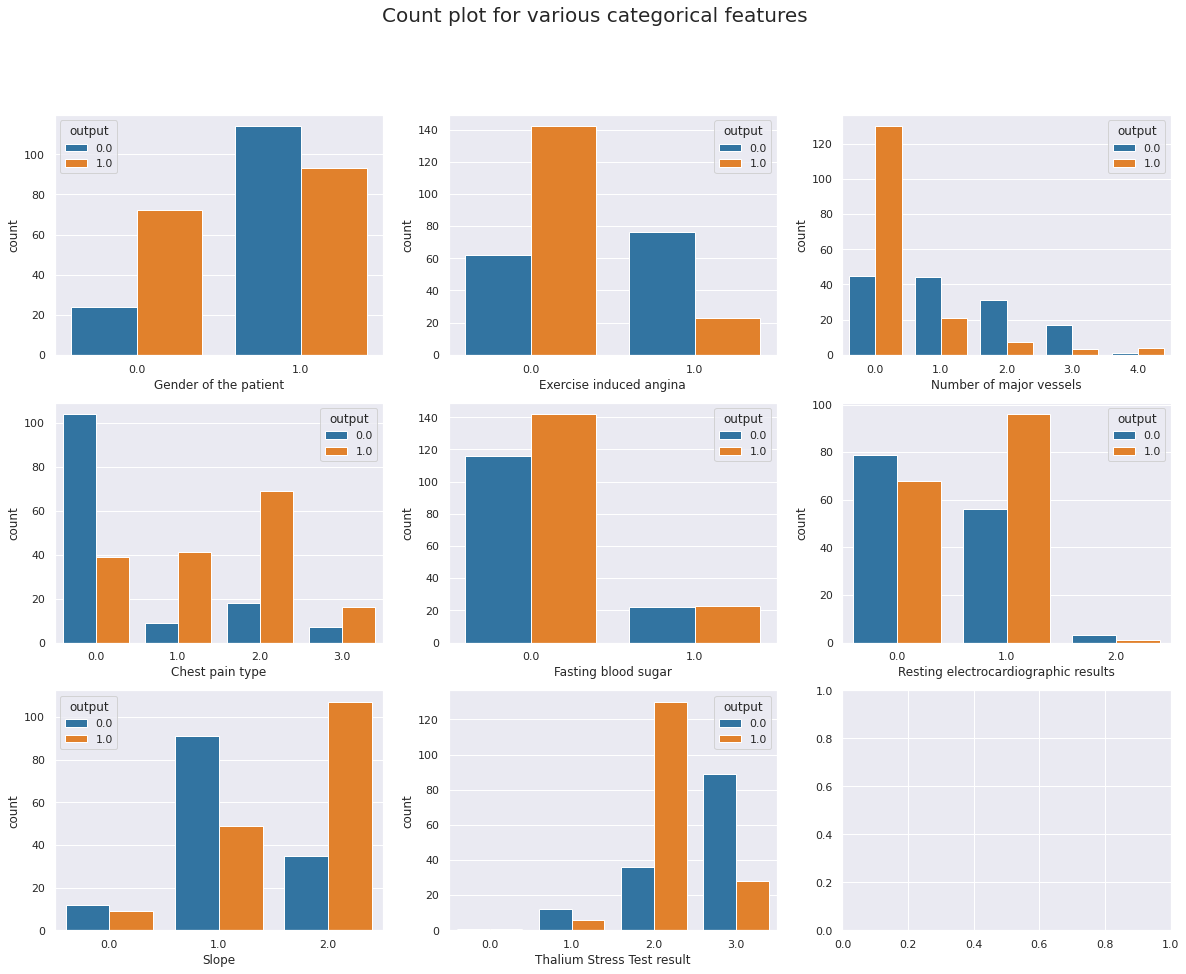

In [ ]:
#@title Categorical Feature Analysis
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
#ax[3, 3].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= df, ax= ax[0, 0], hue = 'output' ,palette= 'tab10')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= df, hue= 'output', ax= ax[0, 1], palette= 'tab10')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= df, ax= ax[0, 2], hue = 'output', palette= 'tab10')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= df, hue = 'output', ax= ax[1, 0], palette= 'tab10')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= df, hue = 'output', ax= ax[1, 1], palette= 'tab10')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= df, ax= ax[1, 2], hue = 'output', palette= 'tab10')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= df, ax= ax[2, 0], hue = 'output', palette= 'tab10')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= df, ax= ax[2, 1], hue = 'output', palette= 'tab10')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()


Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left


Male sex experiences more heart attacks than female. It is wierd how heart attack can occur more when there is no exercise induced angina, fasting sugar low, resting electrocardiographic results being normal and having more cases of heart attack and non are wierd but okay. 

As slop of the heart rate increases the heart attack chances increase. 

In general, as stress increases the heart attack chances increase. 

#Feature Scaling with the RobustScaler Method

Differences between value ranges of the continuous features are so large. Hence, this will not let us compare these features among themselves. We can use some methods to normalize the values of features using normalization and standartization methods. Here, I use RobustScaler to exclude outliers by removing the median and scales the data between 25th quantile and 75th quantile of the feature's probability distribution

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
robust_scaler = RobustScaler()

In [14]:
numeric_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categoric_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [15]:
scaled_data = robust_scaler.fit_transform(df[['age', 'trtbps', 'chol', 'oldpeak','thalachh']])

In [16]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622,  0.9375    , -0.09230769],
       [-1.33333333,  0.        ,  0.15748031,  1.6875    ,  1.04615385],
       [-1.03703704,  0.        , -0.56692913,  0.375     ,  0.58461538],
       ...,
       [ 0.96296296,  0.7       , -0.74015748,  1.625     , -0.36923077],
       [ 0.14814815,  0.        , -1.71653543,  0.25      , -1.16923077],
       [ 0.14814815,  0.        , -0.06299213, -0.5       ,  0.64615385]])

In [17]:
df_scaled = pd.DataFrame(scaled_data, columns = ['age','trtbps','chol','oldpeak','thalachh'] )
df_scaled.head()

,age,trtbps,chol,oldpeak,thalachh
0,0.592593,0.75,-0.110236,0.9375,-0.092308
1,-1.333333,0.00,0.157480,1.6875,1.046154
2,-1.037037,0.00,-0.566929,0.3750,0.584615
3,0.074074,-0.50,-0.062992,0.0000,0.769231
4,0.148148,-0.50,1.795276,-0.1250,0.307692


In [18]:
df_forHM = pd.concat([df_scaled, df[categoric_var]], axis = 1)

In [19]:
df_forHM

,age,trtbps,chol,oldpeak,thalachh,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.592593,0.75,-0.110236,0.9375,-0.092308,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-1.333333,0.00,0.157480,1.6875,1.046154,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,-1.037037,0.00,-0.566929,0.3750,0.584615,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0
3,0.074074,-0.50,-0.062992,0.0000,0.769231,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
4,0.148148,-0.50,1.795276,-0.1250,0.307692,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.3750,-0.923077,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0
299,-0.740741,-1.00,0.377953,0.2500,-0.646154,1.0,3.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
300,0.962963,0.70,-0.740157,1.6250,-0.369231,1.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0
301,0.148148,0.00,-1.716535,0.2500,-1.169231,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0


In [20]:
df_forHM.corr()

,age,trtbps,chol,oldpeak,thalachh,sex,cp,fbs,restecg,exng,slp,caa,thall,output
age,1.000000,0.279351,0.213678,0.210013,-0.398522,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.068001,-0.225439
trtbps,0.279351,1.000000,0.123174,0.193216,-0.046698,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,0.123174,1.000000,0.053952,-0.009940,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.098803,-0.085239
oldpeak,0.210013,0.193216,0.053952,1.000000,-0.344187,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210244,-0.430696
thalachh,-0.398522,-0.046698,-0.009940,-0.344187,1.000000,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.096439,0.421741
sex,-0.098447,-0.056769,-0.197912,0.096093,-0.044020,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,0.047608,-0.076904,-0.149230,0.295762,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.161736,0.433798
fbs,0.121308,0.177531,0.013294,0.005747,-0.008567,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.114103,-0.151040,-0.058770,0.044123,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.011981,0.137230
exng,0.096801,0.067616,0.067023,0.288223,-0.378812,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.206754,-0.436757


#HEAT MAP FOR ALL THE FEATURES

To check if there is any correlation between continuous features and output (heart attack or no attack ).

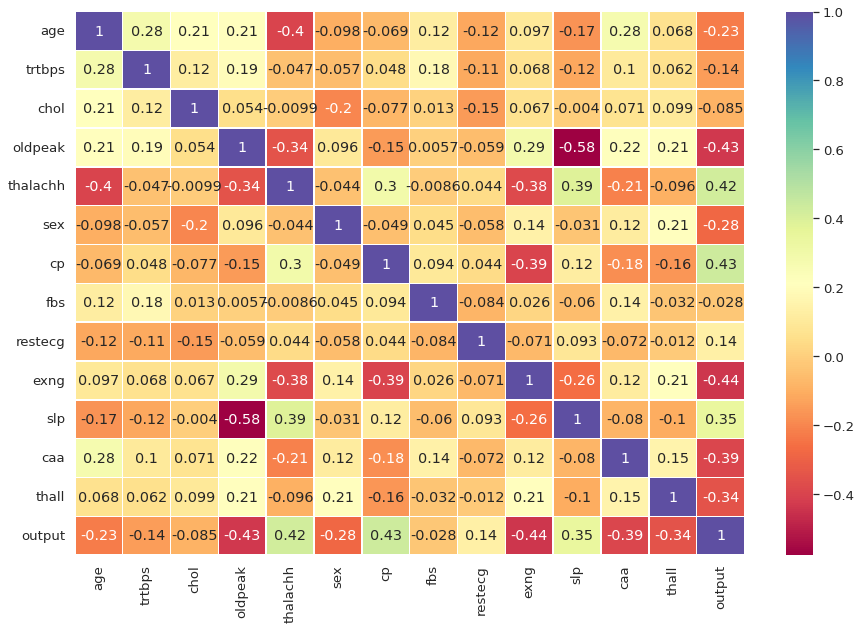

In [21]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_forHM.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

Heart attack chances are highly correlated with maximum heart rate achieved and inversely correlated with previous heart signal peak. Hence, they are important variables to consider for test and training data sets. 

It is important to have as little correlation as possible among variables with each other for model training. 

There is strong inverse correlation between age and maximum heart rate achieved which has strong correlations with output already. Hence we should drop "age" column for our training data set. 

We can drop "resting blood pressure" and " colesterol" columns since they do not display a strong correlation. 



#### Analysis Outputs <a id = 34></a>
#### Age 
* the "thalachh" variable has the highest correlation with the "age" variable. There is a negative correlation between them, which we can call moderately.
* The severity of the correlation is -0.40. In other words, there is a  highly inverse relationship between the "age" and "thalachh" variables.
* In summary, we can say that the amount of heart rate reached decreases as age increases because there is an inverse proportion between them.

#### Trtbps 
*  "age" variable has the highest correlation with the "trtbps" variable. The correlation between them is 0.28
*  There is a positive low-intensity correlation.
*  As "age" increases, the resting blood pressure increases.


#### Chol 
*  "Age" has the highest correlation with "Chol" variable. 
*  The correlation is low positive with a magnitude of 0.21.
*  As age increases, cholesterol also increases.


#### Thelachh
*  The "Thalach" variable has the highest correlation with the "output" variable.

*  There is a 0.42 positive and moderate correlation between them. In other words, it is a variable that can directly trigger a heart attack.

*  There is a variable with which this variable has many correlations.

*  These correlations mean that the maximum heart rate reached maybe a situation triggered by other variables.

#### Oldpeak
*  The most significant correlation ratio among all the variables in the plot is -0.58 between the "slope" and "oldpeak" variable.
*  The correlation between them is negative, which is slightly above medium intensity.
*  The "target" variable is the second most significant correlation which is negative low-intensity.

#### Sex

*  No robust correlation exists between other variables and sex. Only a low-intensity negative correlation -0.28 with "output". 
#### Fbs

*  There is no good correlation of fasting blood sugar with other features. The highest correlation is positive low-intensity correlation with "trtbps" . 

*  We can conclude this as fasting blood sugar increases, resting blood pressure also increases.

#### Rest_ecg

*  There is no good correlation of resting electrchardiographic results with other features. The highest correlation is positive low-intensity correlation with "caa" with highest correlation ratio 0.14 and low-intensity correlation ratio -0.15 with "chol".

#### Exng

*  The "output" variable has the highest correlation to the exercise-induced angina variable with -0.44 correlation ratio. 
*  Additionally, it correlates with other features in addition to "output".

#### Slp

*  "Slp" has highest correlation with "oldpeak" with -0.58 correlation ratio which higher than a moderate correlation and is significant. 

*  There are moderate correlations of slope with "output" and "thalachh". 

*  The lower the heart rate peak, higher the slope. 


#### caa

*  The "Caa" variable has the highest correlation with the output variable as -0.39.
*  Then comes the "age" variable with 0.28. We can say that there is a low positive correlation with the age variable. 

#### thall

*  Thallium stress test results have highest correlation with output at -0.34. There are few more low correlations.  

#### output

*  Output correlates with more than one variable however relationships are below the middle level around 0.4 . 

# DATA PREPARATION FOR MODELING





### Let's drop the columns that are low in correlation with the output (our target as heart disease or none). 


In [22]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1


In [23]:
df.drop(["chol", "fbs", "restecg"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1


### Now cholestoral box plot from previous continuous feature data analysis is eliminated but we still have outlier for the other continuous variables. Let's check them again and eliminate them. 

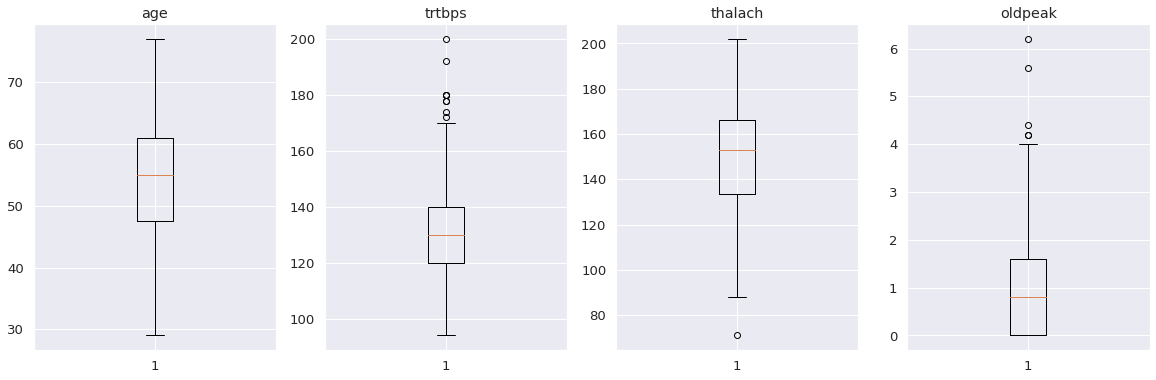

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

Here the data is concentrated to the right for maximum heart rate achieved. It is to the left for previous peak. The outliers are the small circles here. 

# Identify the each outliers for resting blood pressure 

In [26]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

I picked three treshholds to see outliers for each.

In [27]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


Detecting the outliers:

In [28]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172.0
101,178.0
110,180.0
152,170.0
195,170.0
203,180.0
223,200.0
228,170.0
241,174.0
248,192.0


Let's limit the outliers by limiting min max values by applying winsorize method that replaces the min and max data points by the observations closest to them. 

In [29]:
df[z_scores_trtbps > 2].trtbps.min()

170.0

In [30]:
df[df["trtbps"] < 170].trtbps.max()

165.0

In [31]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [32]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [33]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

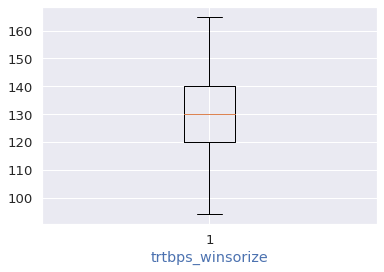

In [34]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [35]:
df["trtbps_winsorize"] = trtbps_winsorize

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df.head()


,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize
0,63.0,1.0,3.0,145.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6,145.0
1,37.0,1.0,2.0,130.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6,130.0
2,41.0,0.0,1.0,130.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6,130.0
3,56.0,1.0,1.0,120.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6,120.0
4,57.0,0.0,0.0,120.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1,120.0


# Identify and eliminate Thalach feature outliers

Let's code to find the outliers

In [37]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [38]:
thalachh_out = iqr(df, "thalachh")



## Only one outlier detected

In [39]:
thalachh_out


,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize
272,67.0,1.0,0.0,120.0,71.0,0.0,1.0,1.0,0.0,2.0,0.0,97.0,120.0


In [40]:
df.drop([272], axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
df["thalachh"][270:275]

270    144.0
271    145.0
273    156.0
274    118.0
275    168.0
Name: thalachh, dtype: float64

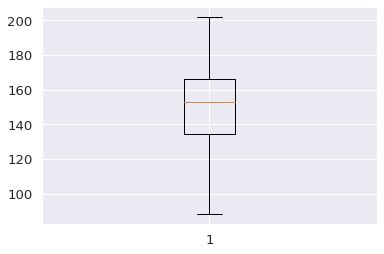

In [42]:
plt.boxplot(df["thalachh"]);

# Identify and eliminate outliers of Oldpeak variable

In [43]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

these are the outliers

In [44]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize
101,59.0,1.0,3.0,178.0,145.0,0.0,4.2,0.0,0.0,3.0,1.0,97.5,165.0
204,62.0,0.0,0.0,160.0,145.0,0.0,6.2,0.0,3.0,3.0,0.0,97.5,160.0
221,55.0,1.0,0.0,140.0,111.0,1.0,5.6,0.0,0.0,3.0,0.0,97.5,140.0
250,51.0,1.0,0.0,140.0,122.0,1.0,4.2,1.0,3.0,3.0,0.0,97.5,140.0
291,58.0,1.0,0.0,114.0,140.0,0.0,4.4,0.0,3.0,1.0,0.0,97.5,114.0


In [45]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

Let's see the rest of the data is what percentage of the whole data points

In [46]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801324503311258


It is quite high which means we can eliminate the outliers without any worry for what dataset left for modeling. 

In [47]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

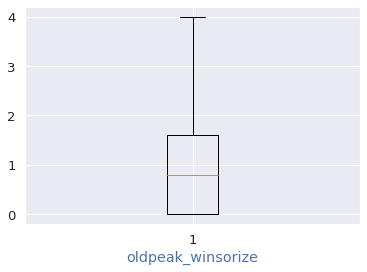

In [48]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [49]:
df["oldpeak_winsorize"] = oldpeak_winsorize

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize
0,63.0,1.0,3.0,145.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6,145.0,2.3
1,37.0,1.0,2.0,130.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6,130.0,3.5
2,41.0,0.0,1.0,130.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6,130.0,1.4
3,56.0,1.0,1.0,120.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6,120.0,0.8
4,57.0,0.0,0.0,120.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1,120.0,0.6


In [51]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize
0,63.0,1.0,3.0,150.0,0.0,0.0,0.0,1.0,1.0,98.6,145.0,2.3
1,37.0,1.0,2.0,187.0,0.0,0.0,0.0,2.0,1.0,98.6,130.0,3.5
2,41.0,0.0,1.0,172.0,0.0,2.0,0.0,2.0,1.0,98.6,130.0,1.4
3,56.0,1.0,1.0,178.0,0.0,2.0,0.0,2.0,1.0,98.6,120.0,0.8
4,57.0,0.0,0.0,163.0,1.0,2.0,0.0,2.0,1.0,98.1,120.0,0.6


# Applying One hot encoding method to categorical variables

Let's charactarize each categorical variable component with a numerical encoding. This allow us to use model predictions more proficiently. 

In [53]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [54]:
categoric_var.remove("fbs")
categoric_var.remove("restecg")

In [55]:
categoric_var

['sex', 'cp', 'exng', 'slp', 'caa', 'thall', 'output']

In [56]:
df = pd.get_dummies(df, columns = categoric_var[:-1], drop_first = True)

In [57]:
df.head()

,age,thalachh,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize,sex_1.0,cp_1.0,cp_2.0,cp_3.0,exng_1.0,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
0,63.0,150.0,1.0,98.6,145.0,2.3,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,37.0,187.0,1.0,98.6,130.0,3.5,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41.0,172.0,1.0,98.6,130.0,1.4,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,56.0,178.0,1.0,98.6,120.0,0.8,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,57.0,163.0,1.0,98.1,120.0,0.6,0,0,0,0,1,0,1,0,0,0,0,0,1,0


Feature scaling with the RobustScaler method of continuous and numerical variables for ML models use

In [58]:
new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize"]

In [59]:
robus_scaler = RobustScaler()

In [60]:
df[new_numeric_var] = robust_scaler.fit_transform(df[new_numeric_var])

In [61]:
df.head()

,age,thalachh,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize,sex_1.0,cp_1.0,cp_2.0,cp_3.0,exng_1.0,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
0,0.581818,-0.095238,1.0,98.6,0.75,0.9375,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,-1.309091,1.079365,1.0,98.6,0.00,1.6875,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1.0,98.6,0.00,0.3750,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0.072727,0.793651,1.0,98.6,-0.50,0.0000,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0.145455,0.317460,1.0,98.1,-0.50,-0.1250,0,0,0,0,1,0,1,0,0,0,0,0,1,0


# Seperating data into test and training set

In [62]:
from sklearn.model_selection import train_test_split
X = df.drop(["output"], axis = 1)
y = df[["output"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [63]:
X_train.head()

,age,thalachh,o2Saturation,trtbps_winsorize,oldpeak_winsorize,sex_1.0,cp_1.0,cp_2.0,cp_3.0,exng_1.0,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
201,0.363636,-0.380952,97.5,-0.25,1.250,1,0,0,0,1,1,0,1,0,0,0,0,0,1
82,0.363636,0.222222,97.5,-1.40,-0.500,0,0,1,0,0,0,1,1,0,0,0,0,1,0
187,-0.072727,-1.396825,97.5,-0.30,0.875,1,0,0,0,1,1,0,1,0,0,0,0,0,1
259,-1.236364,0.920635,97.5,-0.50,1.875,1,0,0,1,1,1,0,0,0,0,0,0,0,1
5,0.145455,-0.158730,97.5,0.50,-0.250,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [64]:
y_train.head()

,output
201,0.0
82,1.0
187,0.0
259,0.0
5,1.0


In [65]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


There are 31 test data points and 271 training data points.

# Modelling

## Logistic Regression Algorithm 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg


LogisticRegression()

In [67]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [68]:
y_pred = log_reg.predict(X_test)

In [69]:
y_pred

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


We can use cross validation to check training sets of all the dataset portion by portion and find the average of all.

In [71]:
from sklearn.model_selection import cross_val_score


We are using 10 folds generation of test set. 

In [72]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Saving 1920px-K-fold_cross_validation_EN.svg.png to 1920px-K-fold_cross_validation_EN.svg (5).png


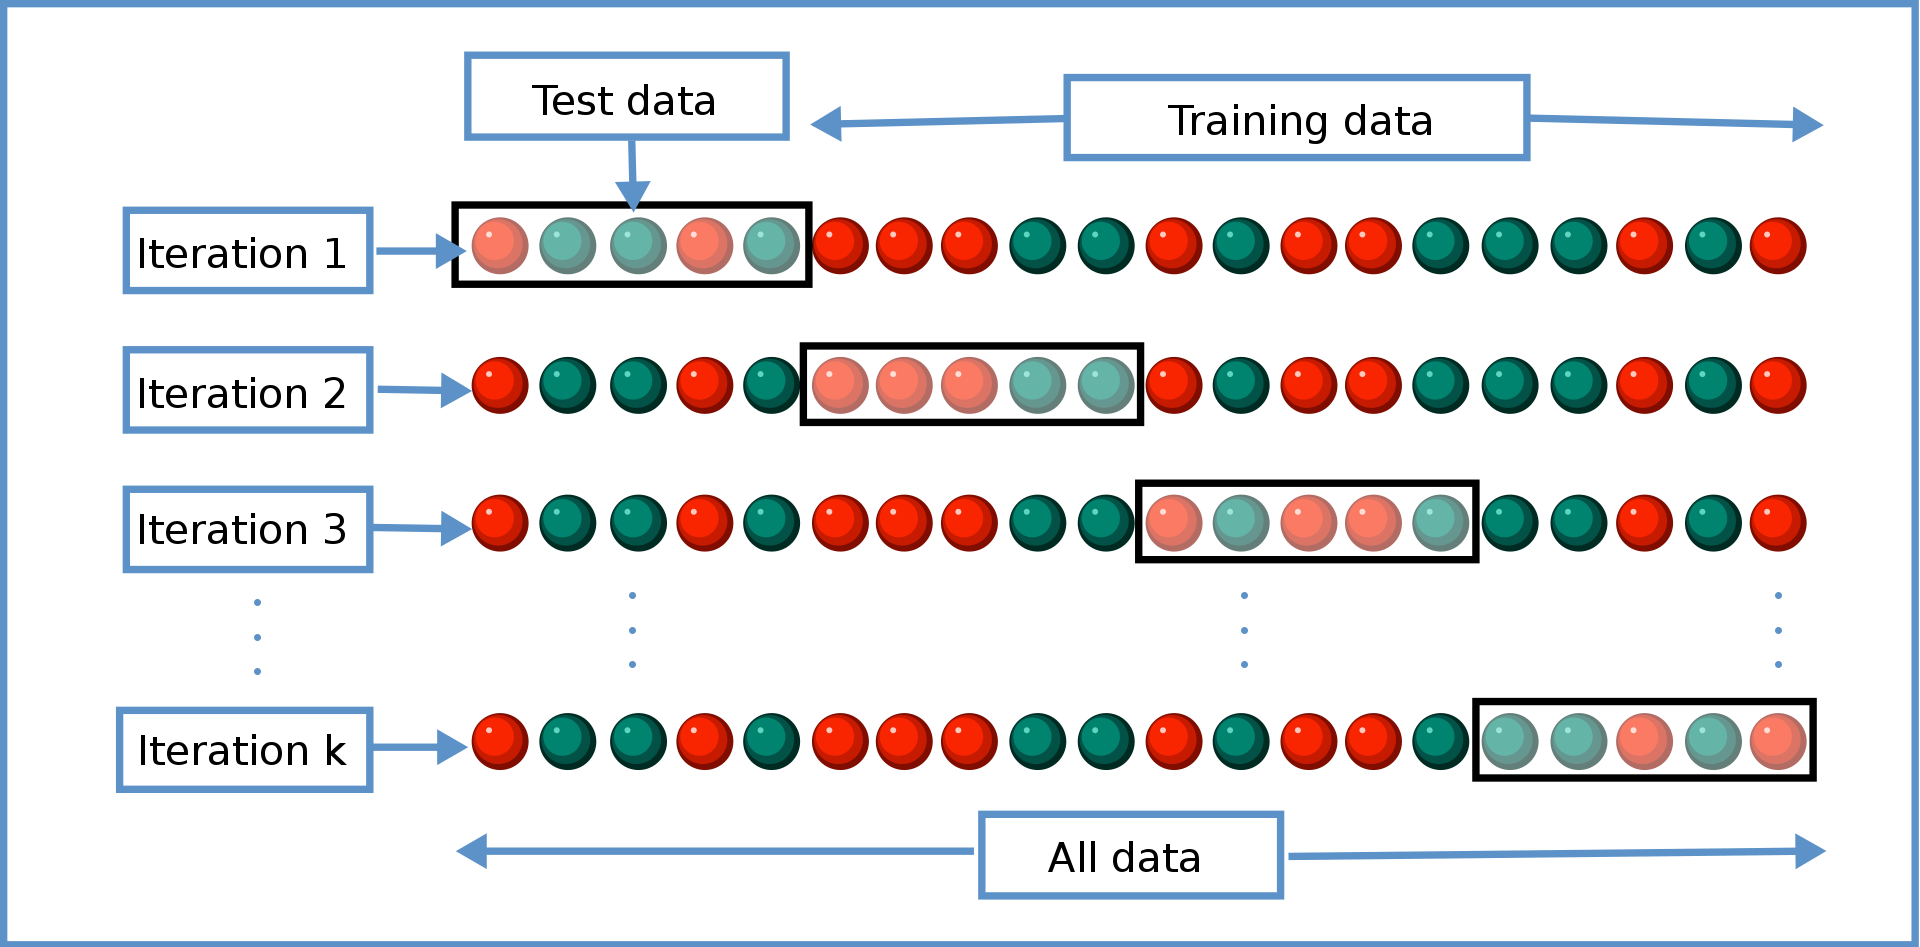

In [ ]:
#@title An example of how cross validation makes selestion of training and test data sets
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('1920px-K-fold_cross_validation_EN.svg.png')


In [73]:
scores

array([0.89285714, 0.77777778, 0.85185185, 0.92592593, 0.92592593,
       0.81481481, 0.96296296, 0.7037037 , 0.85185185, 0.7037037 ])

In [74]:

print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8411375661375662


## ROC Curve and Area Under ROC Curve

The area of field under the curve given tells us how likely the logistic regression could evaluate true results. As it is closer to the y axis therefore has bigger area under the plot, we can conclude there are significantly correct prediction results. 


Saving Roc_curve.svg.png to Roc_curve.svg (2).png


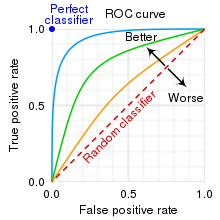

In [83]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('Roc_curve.svg.png')

In [80]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


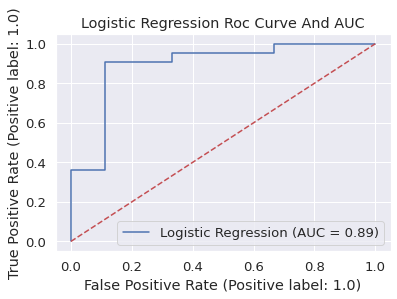

In [81]:
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

###  Here we get 0.89 AUC value which is close to be excellent if we categorize them as 0.8-0.9 good and 0.9-1 as excellent. 

# Hyperparameter optimization with GridSearchCV.

Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

 It tries all different combinations to identify the best performing hyper parameters of the ML model. It is a simple algorithm to use hence it works well with small data sets like ours rather than large. 

In [91]:
from sklearn.model_selection import GridSearchCV

In [89]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [93]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [94]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [ ]:
log_reg_grid.fit(X_train, y_train)

In [96]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}


In [97]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [98]:
log_reg_new2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='l1', solver='saga')

In [99]:
y_pred = log_reg_new2.predict(X_test)

In [100]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


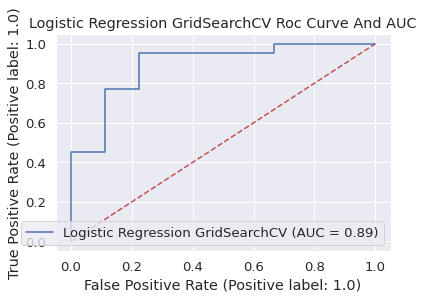

In [101]:
plot_roc_curve(log_reg_new2, X_test, y_test, name = "Logistic Regression GridSearchCV")
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

# Decision Tree Algorithm 

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dec_tree = DecisionTreeClassifier(random_state = 5)


In [104]:
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [105]:
y_pred = dec_tree.predict(X_test)


In [106]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))


The test accuracy score of Decision Tree is: 0.9032258064516129


In [107]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


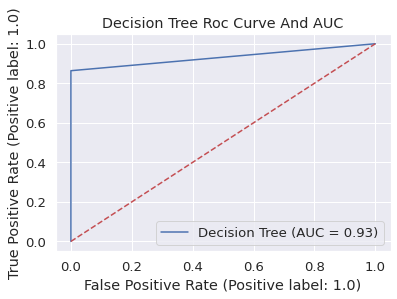

In [108]:
plot_roc_curve(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

# Support Vector Machine Algorithm 

In [128]:
from sklearn.svm import SVC

In [129]:
svc_model = SVC(random_state = 5)

In [130]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=10)

In [131]:
y_pred = svc_model.predict(X_test)

In [132]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.7096774193548387


In [ ]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

It is 0.708

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


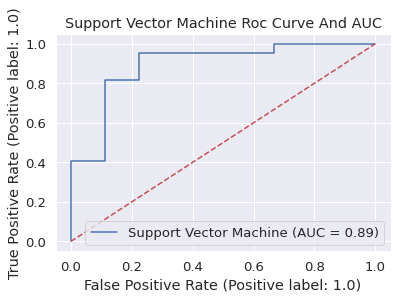

In [116]:
plot_roc_curve(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

# Random Forest Algorithm

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
random_forest = RandomForestClassifier(random_state = 5)

In [119]:
random_forest.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=5)

In [120]:
y_pred = random_forest.predict(X_test)

In [121]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.9032258064516129


In [ ]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

It is 0.83333

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


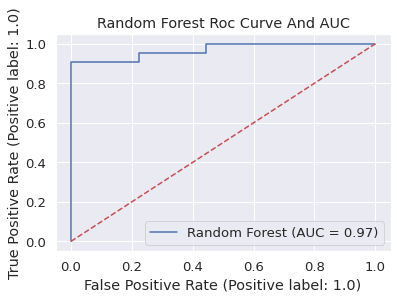

In [123]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

# XGBoost Ensemble Algorithm

In [126]:
from xgboost import XGBClassifier


In [127]:
model_xgb = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=25)

#Training the model
model_xgb.fit(X_train, y_train)

#Prediction
y_xgb = model_xgb.predict(X_test)

#Accuracy
print("The test accuracy score of XGBoost is", accuracy_score(y_test, y_pred))

The test accuracy score of XGBoost is 0.9032258064516129


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# AdaBoost Classifier

In [134]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [137]:
model1 = adaboost.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
y_pred = model1.predict(X_test)

In [140]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.8064516129032258


#Extra Trees Classifier

In [141]:
from sklearn.ensemble import ExtraTreesClassifier

In [143]:
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)

ExtraTreesClassifier()


In [148]:
etc= clf.fit(X_train, y_train)


Score:  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [149]:
y_pred1 = etc.predict(X_test)

In [150]:
accuracy_score(y_test, y_pred1)

0.8709677419354839

# Gradient Boosting Classifier

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [153]:
gb= gradient_booster.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
y_predgb = gb.predict(X_test)

In [155]:
accuracy_score(y_test, y_predgb)

0.9032258064516129

In [157]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [158]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [159]:
CB = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

In [161]:
CB.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

NameError: ignored

no NN because small dataset. 
XG boosting Ensemble models

WE NEED A MIDIUM DATASET


productive ready

how much missing value available? 


#Chi-Squared Test on Categorical Features

P-value for fasting blood sugar is very high - higher than 0.5 - which means there is nearly no correlation between this variable and the output. Other variables can have correlation since p-value is smaller than 0.5.

In [ ]:

df_data= df_numerical[["output","age","thalachh","oldpeak","sex","exng","caa","cp","restecg","slp","thall"]]


In [ ]:
df_scaled = pd.DataFrame(scaled_data, columns = df_data)
df_scaled.head()

NameError: ignored

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()


In [ ]:
X = df_data.drop('output', axis = 1)
y = df_data['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [ ]:
X_train.head()

,age,thalachh,oldpeak,sex,exng,caa,cp,restecg,slp,thall
288,55-60,143.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0
80,0-45,179.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0
111,55-60,173.0,0.2,1.0,0.0,1.0,2.0,1.0,2.0,3.0
180,45-55,132.0,1.2,1.0,1.0,1.0,0.0,1.0,1.0,3.0
105,60+,115.0,1.5,0.0,0.0,0.0,2.0,0.0,1.0,2.0
